# Prueba Intertrimestral

**Nombre:** Álvaro

**Apellidos:** Olivié Molina

**Tiempo de la prueba: 2 Horas**

**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos

**Fecha:** 18 de octubre de 2023

**Instrucciones:**

- Escribe código limpio y autoexplicativo.

- Se eliminará 0.5 puntos por usar Seaborn o Matplotlib.

- Se pueden utilizar los materiales de clase.

- Se puede utilizar internet para búsqueda de dudas y documentación.

- No se puede utilizar ningún tipo de LLM.

- No se puede utilizar mensajería instantánea.

- Sube tus resultados a tu repositorio de Github.

- Imprime una versión en PDF en A3 y Portrait del notebook.

- Envialo tus resultados a dmartincorral@icai.comillas.edu adjuntando el PDF y la url del notebook subido al repositorio de Github.


## Inicialización de librerías

Carga aquí todas las librerías que vayas a utilizar.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Ejercicio 1 (2 puntos):

a) Crea una función que calcule y devuelva el factorial de un número entero. **(0.6 puntos)**

b) Crea una función que verifique si un número es primo o no. **(0.6 puntos)**

c) Muestra en un dataframe los 50 primeros números positivos, si es primo y su factorial utilizando las funciones anteriores. **(0.6 puntos)**

d) ¿Cómo se podría programar en una clase las tres operaciones anteriores? **(0.2 puntos)**

In [3]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [4]:
def es_primo(n):
    if n < 2:
        return False
    elif n == 2:
        return True
    else:
        for i in range(2, n):
            if n % i == 0:
                return False
        return True

In [9]:
list = []
for i in range(1, 51):
    list.append({'Número': i, 'Primo': es_primo(i), 'Factorial': factorial(i)})
df = pd.DataFrame(list, columns=['Número', 'Primo', 'Factorial'])
df


,Número,Primo,Factorial
0,1,False,1
1,2,True,2
2,3,True,6
3,4,False,24
4,5,True,120
5,6,False,720
6,7,True,5040
7,8,False,40320
8,9,False,362880
9,10,False,3628800


Creando una donde su funcion sea generar el dataframe y los metodos internos sean los creados anteriormente. El atributo seria el daataframe y se crearia al instanciar la clase.

## Ejercicio 2 (4 puntos):

a) Extrae de sklearn el conjunto de datos __California Housing dataset__
 y transfórmalo a dataframe de pandas **(0.25 puntos)**

b) Construye una función que muestra la estructura del dataset, el número de NAs, tipos de variables y estadísticas básicas de cada una de las variables. **(0.5 puntos)**

c) Construye una __Regresión lineal__ y un __Random forest__ que predigan el __Median house value__ según los datos disponibles. **(0.75 puntos)**

d) Visualiza cuales son las variables (coeficientes) más importantes en cada uno de los modelos. **(1.25 puntos)**

e) Decide a través de las métricas que consideres oportunas, cuál de los dos modelos es mejor, por qué y explica el proceso que has realizado para responder en los puntos anteriores. **(1.25 puntos)**

In [19]:
california_housing = fetch_california_housing(as_frame=True)

ch = pd.DataFrame(data = california_housing['data'], columns = california_housing['feature_names'])
y = california_housing['target']

In [16]:
def estructura(df):
    print('Estructura del dataset')
    print(df.info())
    print('Número de NAs')
    print(df.isna().sum())
    print('Tipos de variables')
    print(df.dtypes)
    print('Estadísticas básicas')
    print(df.describe())

In [31]:

train_ch, test_ch, train_y, test_y = train_test_split(ch, y, test_size = 0.25, random_state = 42)

El error lr: 0.541128747847069
El R2 lr: 0.591050979549135


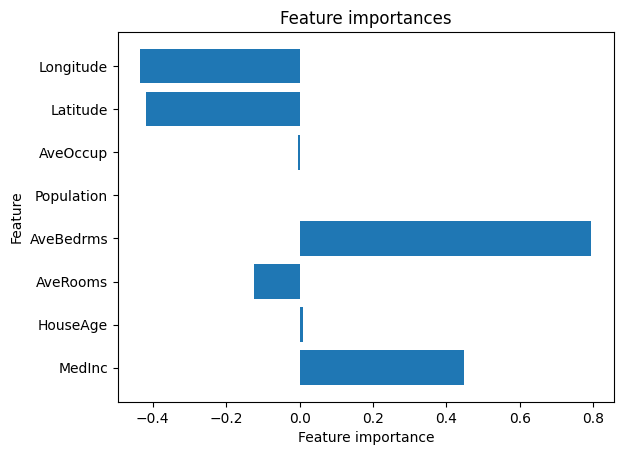

In [38]:
lr = LinearRegression()
lr.fit(train_ch, train_y)
plr = lr.predict(test_ch)
error = mean_squared_error(test_y, plr)
print('El error lr:', error)
r2 = r2_score(test_y, plr)
print('El R2 lr:', r2)

plt.figure()
plt.title("Feature importances")
plt.barh(ch.columns, lr.coef_)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

El error rf: 0.25448766543513524
El R2 rf: 0.8076751939153334


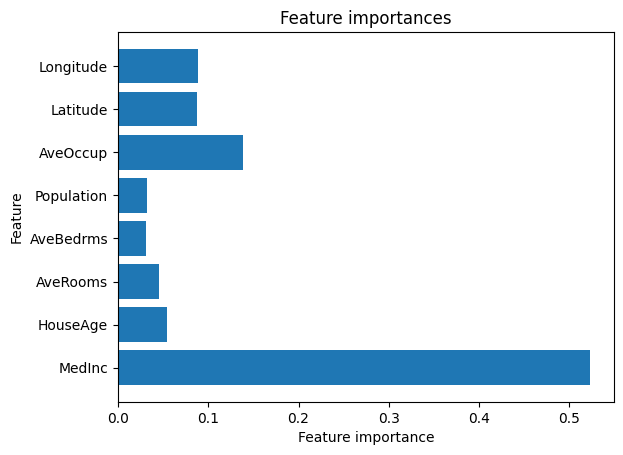

In [41]:
rf = RandomForestRegressor()
rf.fit(train_ch, train_y)
prf = rf.predict(test_ch)
error = mean_squared_error(test_y, prf)
print('El error rf:', error)
r2 = r2_score(test_y, prf)
print('El R2 rf:', r2)

plt.figure()
plt.title("Feature importances")
plt.barh(ch.columns, rf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

El modelo de random forest es mejor que el modelo de linear regression. Esto se ve en que tiene un R cuadrado mucho mas alto y un error mucho mas bajo. Cabe destacar que el modelo de linear regression es mucho mas rapido

Para realizar los dos ejercicios anteriores he seguido la misma estructura para ambos modelos. He dividido entre train y test los datos, he creado un modelo y lo he entrenado con los datos train. Despues he predecido los resultados con test y he comparado con el test_y. Con estos resultados he calculado el error y R cuadrado que sirven como metricas de un buen modelo. 

Para visualizar el peso de las variables de cada modelo he hecho un plot con el peso que le he dado el modelo a cada variable. En ambos casos el ingreso medio ha tenido un peso importante pero en el modelo de regresion lineal tambien ha afectado mucho el numero de cuartos

## Ejercicio 3 (4 puntos):


*Consideremos* el dataset que contiene __The Most Streamed Spotify Songs 2023__ que se encuentra en el respositorio.

Información de las variables:

- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- vartist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- release_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

Para las respuestas b, c, d, e, f y g es imperativo acompañarlas respuestas con una visualización.

a) Lee el fichero en formato dataframe, aplica la función del ejercicio 2.b, elimina NAs y convierte a integer si fuera necesario. **(0.25 puntos)**

b) ¿Cuántos artistas únicos hay? **(0.25 puntos)**

c) ¿Cuál es la distribución de reproducciones? **(0.5 puntos)**

d) ¿Existe una diferencia signitificativa en las reproducciones entre las canciones de un solo artista y las de más de uno? **(0.5 puntos)**

e) ¿Cuáles son las propiedades de una canción que mejor correlan con el número de reproducciones de una canción? **(0.5 puntos)**

f) ¿Cuáles son las variables que mejor predicen las canciones que están por encima el percentil 50? **(1 puntos)**

*Nota: Crea una variable binaria (Hit/No Hit) en base a 3.c, crea una regresión logística y visualiza sus coeficientes.*

g) Agrupa los 4 gráficos realizados en uno solo y haz una recomendación a un sello discográfico para producir un nuevo hit. **(1 puntos)**


In [52]:
df = pd.read_csv("spotify-2023.csv", encoding='iso-8859-1')

estructura(df)

df = df.dropna()
pd.to_numeric(df["streams"], errors='coerce')
df["streams"] = df["streams"].astype('Int64')
df["in_deezer_playlists"] = df["in_deezer_playlists"].str.replace(',', '')
df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(',', '')
df["in_deezer_playlists"] = df["in_deezer_playlists"].astype('Int64')
df["in_shazam_charts"] = df["in_shazam_charts"].astype('Int64')

Estructura del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key              

627


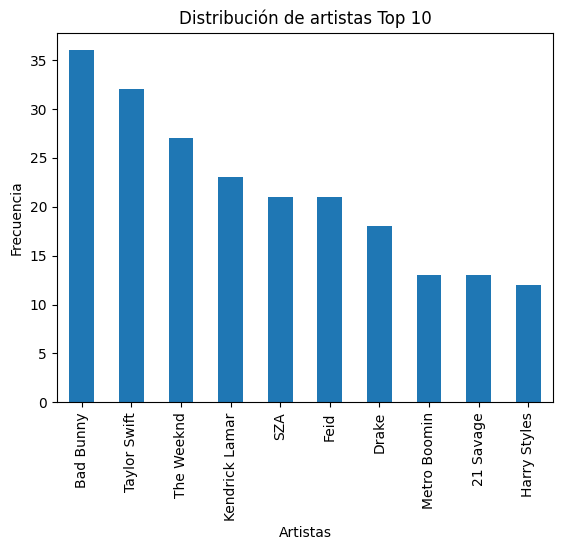

In [69]:
artists = []
for i in range(len(df)):
    a = df.iloc[i, 1].split(', ')
    for i in a:
        artists.append(i)
artists = pd.Series(artists)
print(len(artists.unique()))


plt.figure()
plt.title("Distribución de artistas Top 10")
artists.value_counts()[:10].plot(kind='bar')
plt.xlabel("Artistas")
plt.ylabel("Frecuencia")
plt.show()

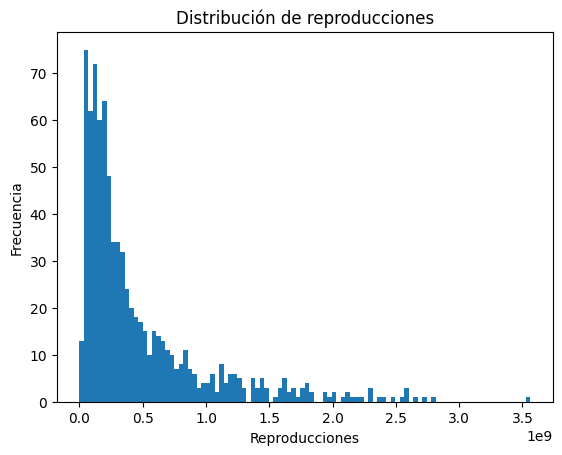

In [72]:
plt.figure()
plt.title("Distribución de reproducciones")
plt.hist(df['streams'], bins=100)
plt.xlabel("Reproducciones")
plt.ylabel("Frecuencia")
plt.show()

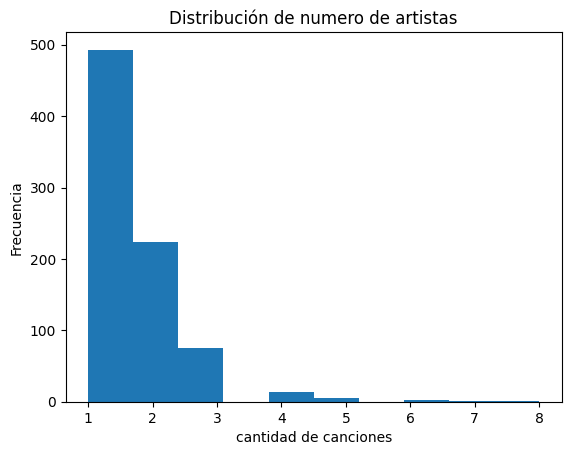

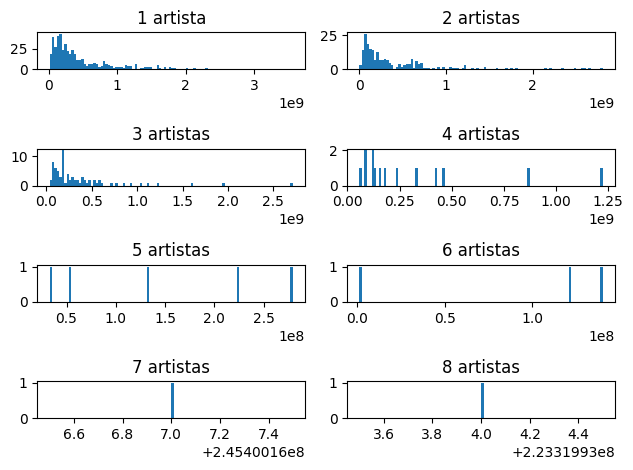

506394387.7647059
438857124.5401786
383979688.8666667
320165540.35714287
144808200.4
87466453.0
245400167.0
223319934.0


In [80]:
plt.figure()
plt.title("Distribución de numero de artistas")
plt.hist(df['artist_count'], bins=10)
plt.xlabel("cantidad de canciones")
plt.ylabel("Frecuencia")
plt.show()

df1 = df[df['artist_count'] == 1]
df2 = df[df['artist_count'] == 2]
df3 = df[df['artist_count'] == 3]
df4 = df[df['artist_count'] == 4]
df5 = df[df['artist_count'] == 5]
df6 = df[df['artist_count'] == 6]
df7 = df[df['artist_count'] == 7]
df8 = df[df['artist_count'] == 8]

plt.figure()
plt.subplot(4, 2, 1)
plt.hist(df1['streams'], bins=100)
plt.title("1 artista")
plt.subplot(4, 2, 2)
plt.hist(df2['streams'], bins=100)
plt.title("2 artistas")
plt.subplot(4, 2, 3)
plt.hist(df3['streams'], bins=100)
plt.title("3 artistas")
plt.subplot(4, 2, 4)
plt.hist(df4['streams'], bins=100)
plt.title("4 artistas")
plt.subplot(4, 2, 5)
plt.hist(df5['streams'], bins=100)
plt.title("5 artistas")
plt.subplot(4, 2, 6)
plt.hist(df6['streams'], bins=100)
plt.title("6 artistas")
plt.subplot(4, 2, 7)
plt.hist(df7['streams'], bins=100)
plt.title("7 artistas")
plt.subplot(4, 2, 8)
plt.hist(df8['streams'], bins=100)
plt.title("8 artistas")
plt.tight_layout()
plt.show()

print(df1['streams'].mean())
print(df2['streams'].mean())
print(df3['streams'].mean())
print(df4['streams'].mean())
print(df5['streams'].mean())
print(df6['streams'].mean())
print(df7['streams'].mean())
print(df8['streams'].mean())


Hay una tendencia a bajar a medida que el numero de cantantes sube. Al final vuelve a subir pero esto es debido a que hay muy pocas canciones con tantos cantantes y suele ser gente famosa que se unen y se hacen virales.

El R2 lr: 0.7229380784007834


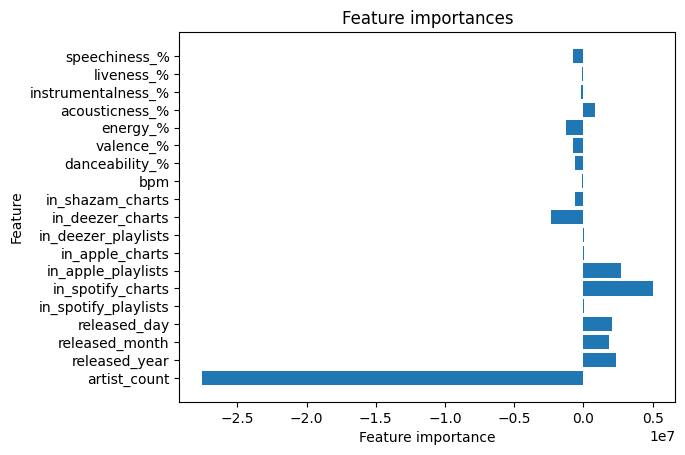

In [87]:
target = df['streams']
features = df.drop(['streams', 'track_name', 'artist(s)_name', 'key', 'mode'], axis=1)
lr = LinearRegression()
lr.fit(features, target)
plr = lr.predict(features)
r2 = r2_score(target, plr)
print('El R2 lr:', r2)


plt.figure()
plt.title("Feature importances")
plt.barh(features.columns, lr.coef_)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()
